# 1. Import libraries and files

In [1]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

In [2]:
songs_df = pd.read_csv('df_audio_features_5000.csv')

# 2. Prepare dataframe

In [3]:
songs_df.head(3)

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.730,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...


In [4]:
print(songs_df.columns)

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')


In [5]:
# Strip trailing spaces from column names
songs_df.columns = songs_df.columns.str.strip()

In [6]:
print(songs_df.columns)

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')


In [7]:
songs_df['type'].unique()

array(['     '], dtype=object)

In [8]:
#Set name of song and artist as index and drop columns without values
songs_df['song_artist'] = songs_df['name'] + ' - ' + songs_df['artist']
songs_df = songs_df.set_index('song_artist')
songs_df = songs_df.drop(['name', 'artist', 'id', 'html', 'Unnamed: 0', 'type'], axis=1)
songs_df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4
Saudade De Bahia - Antônio Carlos Jobim,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4
"Canta Canta, Minha Gente - Martinho Da Vila",0.851,0.730,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4


In [9]:
#Check for duplicates
songs_df.duplicated().value_counts()

False    5160
True       75
Name: count, dtype: int64

In [10]:
songs_df = songs_df.drop_duplicates()

In [11]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5160 entries, Se Eu Quiser Falar Com Deus                                                                                                                                                       - Gilberto Gil                                     to Ravel: Boléro, M. 81                                                                                                                                                            - Maurice Ravel                                   
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5160 non-null   float64
 1   energy            5160 non-null   float64
 2   key               5160 non-null   int64  
 3   loudness          5160 non-null   float64
 4   mode              5160 non-null   int64  
 5   speechiness       5160 non-null   float64
 6   acousticness      5160 non-null   float64
 7   instrumentalness  516

# 3. Scaling

## 3.1 Min and Max Scaling

In [12]:
# Create a MinMaxScaler object
scaler = MinMaxScaler().set_output(transform="pandas")

# Scale the DataFrame
songs_df_minmax = scaler.fit_transform(songs_df)

In [13]:
songs_df_minmax.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil,0.680455,0.259,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
Saudade De Bahia - Antônio Carlos Jobim,0.767322,0.399,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
"Canta Canta, Minha Gente - Martinho Da Vila",0.880041,0.730,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8


# 5. Assigning songs to playlists (groups) based on their Euclidian distance with KMeans und analysing the clusters

In [14]:
#initialize the model
my_kmeans = KMeans(n_clusters=21, n_init="auto", random_state=123)

In [15]:
my_kmeans.fit(songs_df_minmax)
my_kmeans.predict(songs_df_minmax)
songs_df_minmax["group"] = my_kmeans.predict(songs_df_minmax)

In [16]:
songs_df_minmax["group"].value_counts()

group
16    524
20    454
2     358
3     330
13    316
5     290
8     286
15    285
10    237
14    229
17    226
4     204
1     200
6     194
12    190
9     165
18    156
0     149
11    136
19    117
7     114
Name: count, dtype: int64

## Looking into the Clusters

In [17]:
songs_df_minmax.groupby(by="group").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
group,,,,,,,,,,,,,
0,0.359645,0.923685,0.729103,0.880864,0.0,0.129807,0.013614,0.091583,0.240935,0.196836,0.575085,0.059535,0.783893
1,0.657482,0.602560,0.135909,0.833399,1.0,0.077087,0.535080,0.043371,0.193975,0.755218,0.552555,0.044276,0.798000
2,0.324508,0.130398,0.427628,0.618082,1.0,0.049116,0.945985,0.877722,0.133552,0.163563,0.496406,0.083239,0.729609
3,0.407004,0.852555,0.750138,0.873630,1.0,0.108123,0.046408,0.072891,0.216344,0.255016,0.581130,0.059910,0.781818
4,0.571040,0.346329,0.464795,0.777145,0.0,0.068953,0.774677,0.039263,0.189599,0.463705,0.532442,0.056680,0.774510
5,0.296122,0.902486,0.703762,0.849462,1.0,0.110985,0.012712,0.798593,0.211708,0.257812,0.566246,0.059656,0.785517
6,0.557000,0.775041,0.213215,0.882268,0.0,0.090233,0.083771,0.020985,0.229339,0.354732,0.598017,0.051231,0.789691
7,0.333941,0.129609,0.799841,0.614350,0.0,0.048526,0.930406,0.887372,0.129725,0.174666,0.491699,0.078163,0.752632
8,0.294355,0.890140,0.136046,0.840150,1.0,0.108381,0.012522,0.817841,0.200330,0.258375,0.578265,0.057570,0.767832


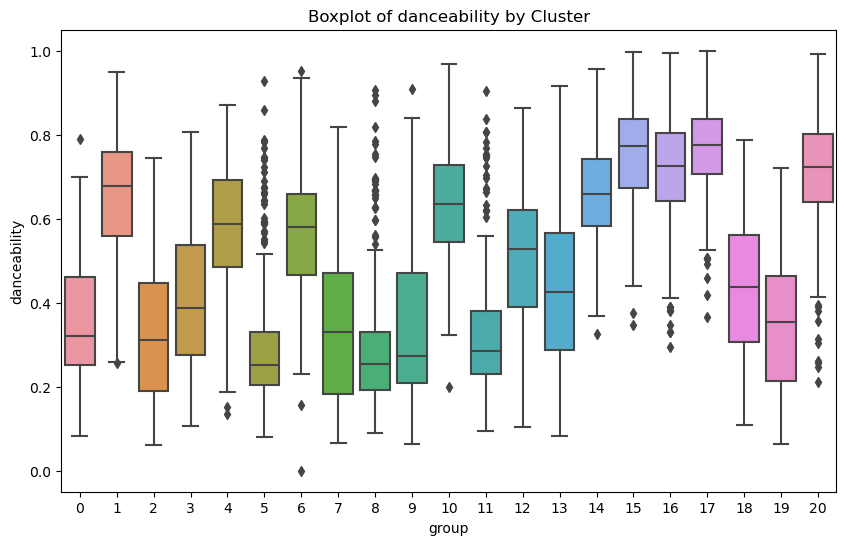

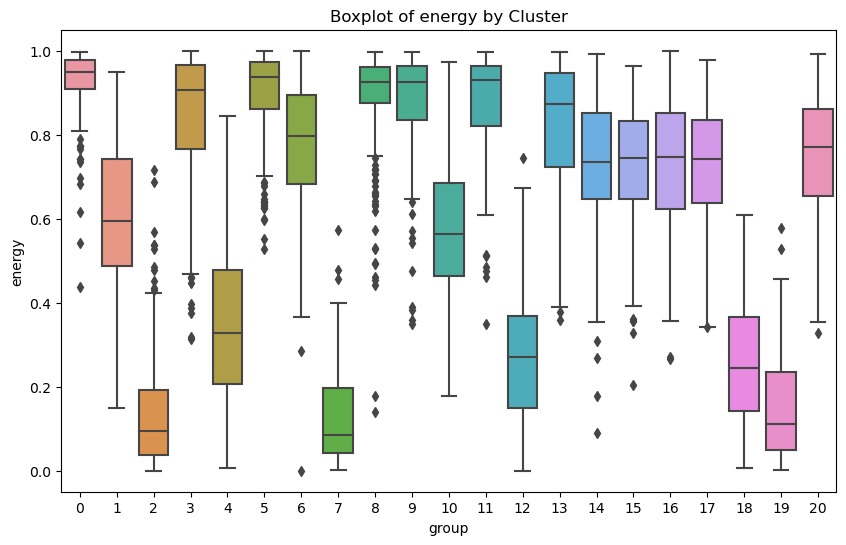

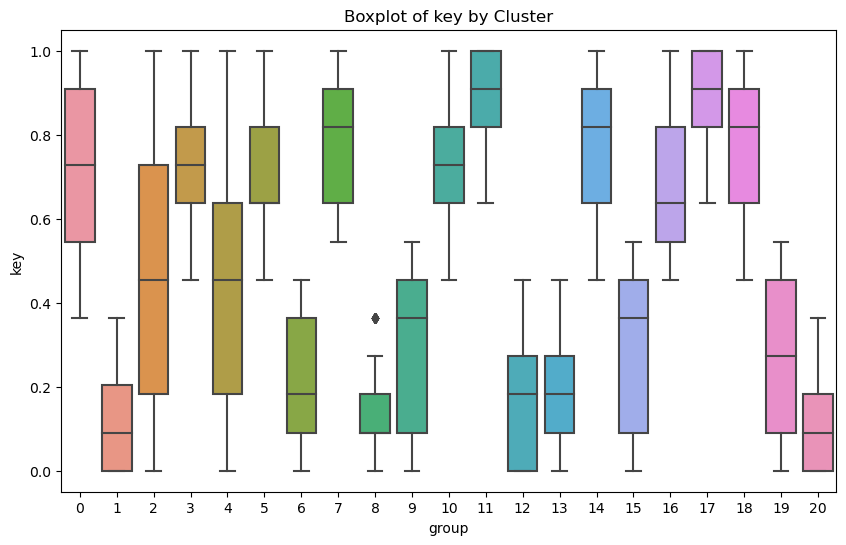

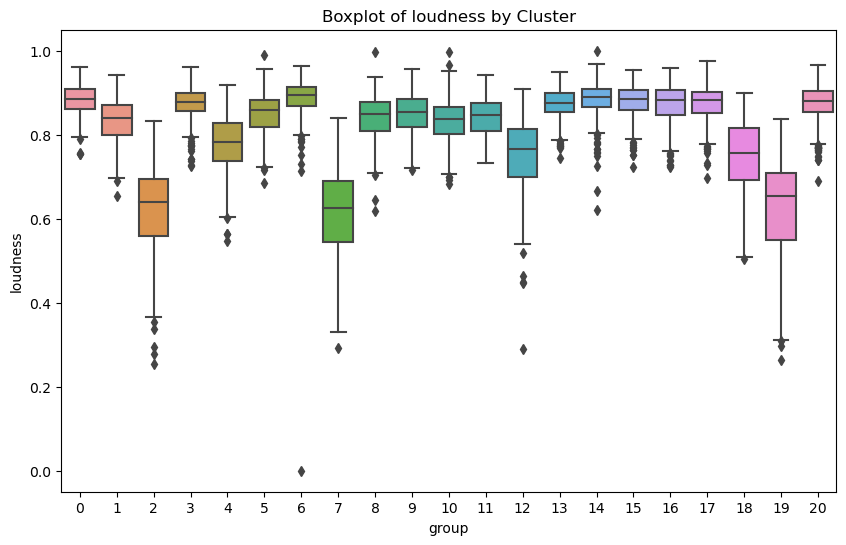

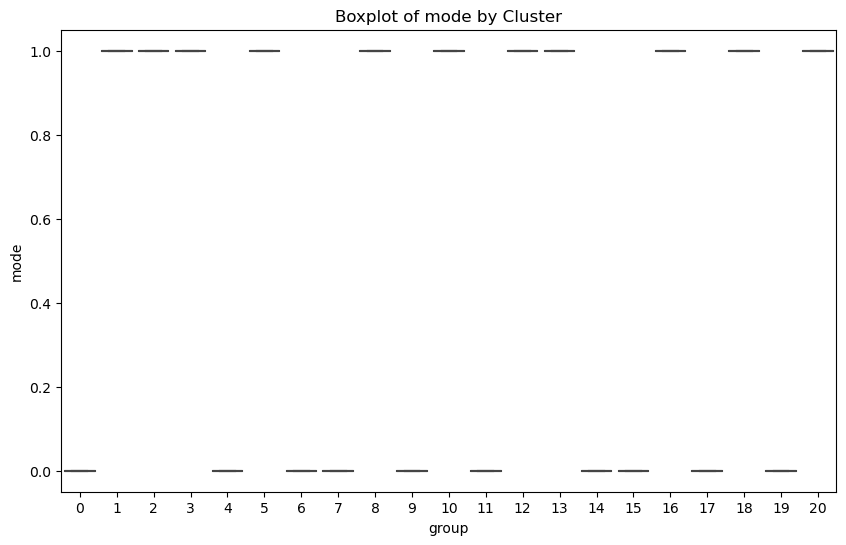

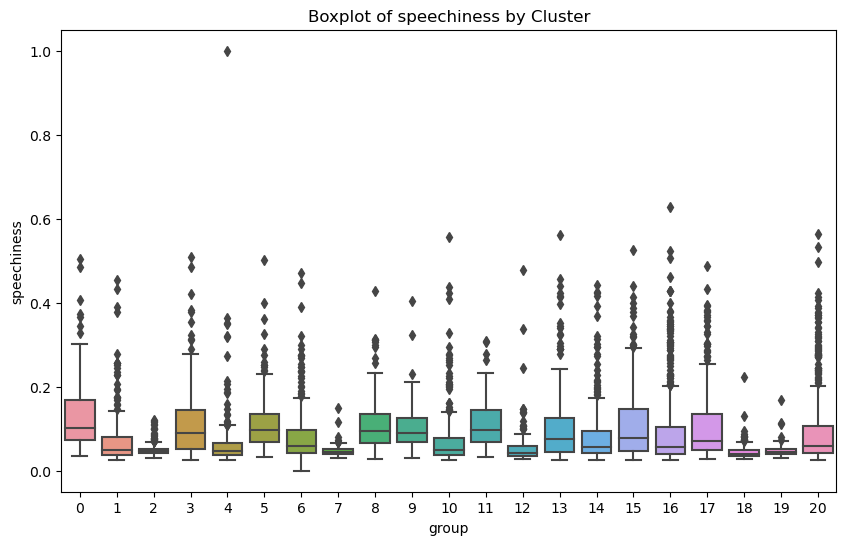

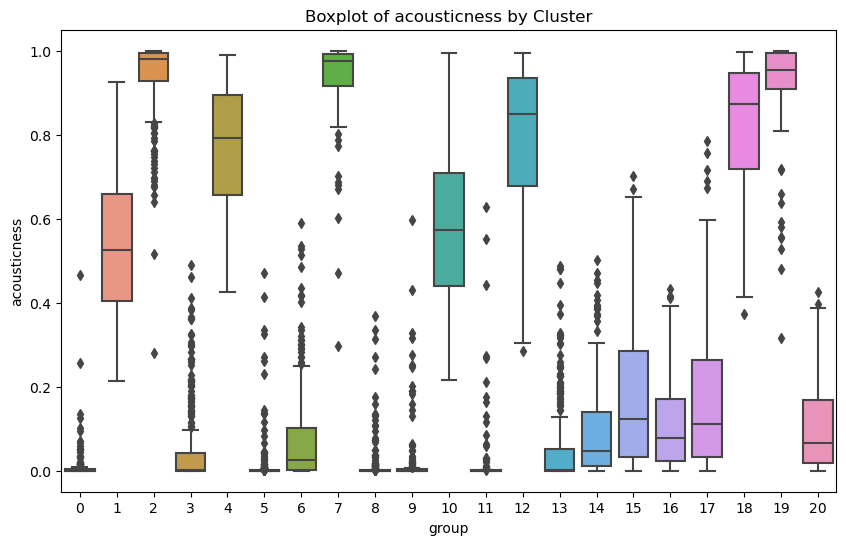

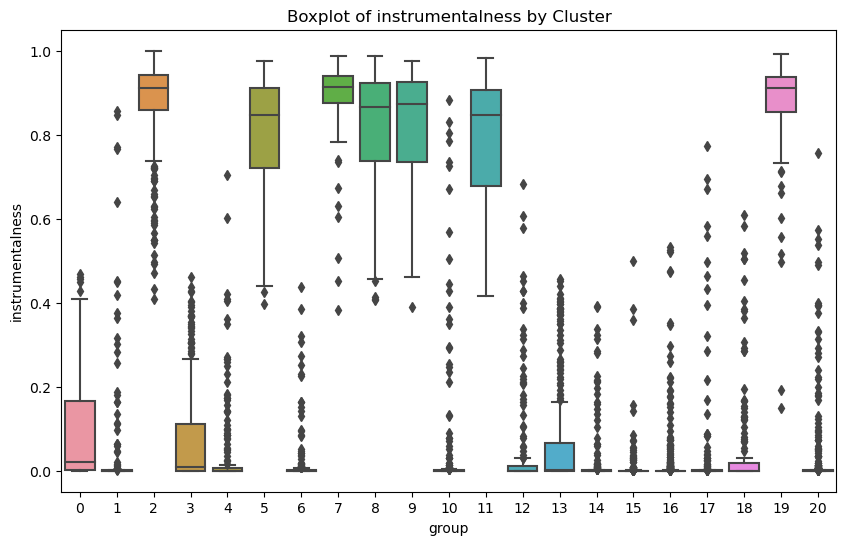

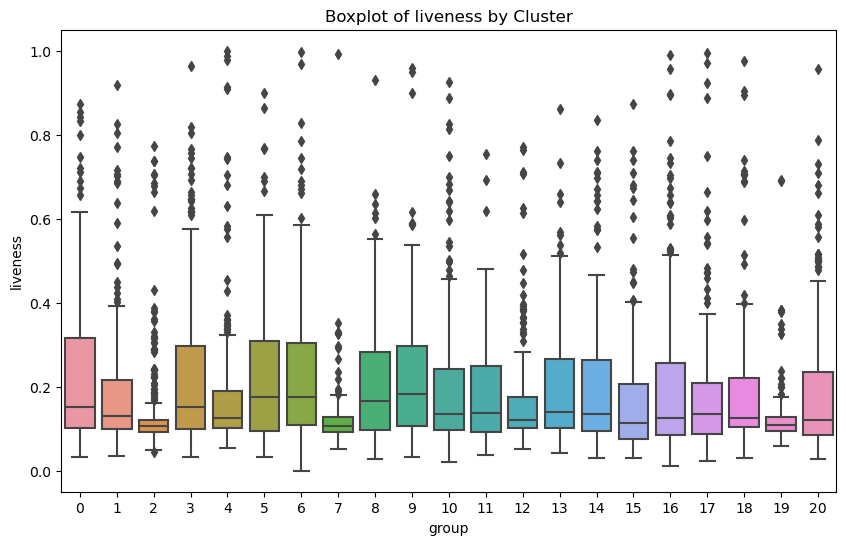

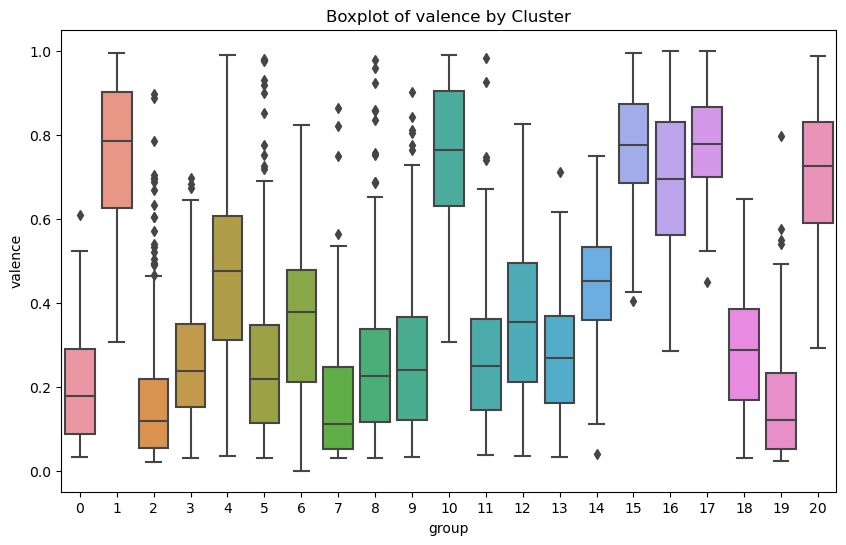

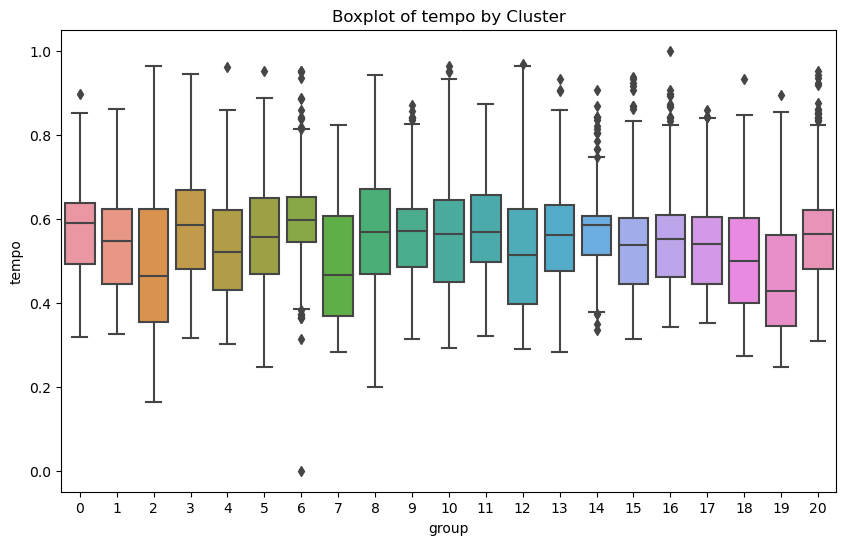

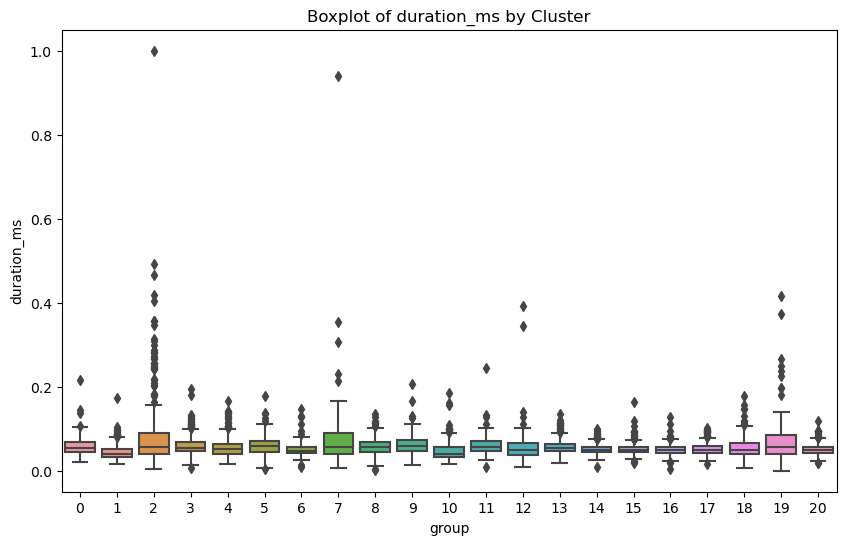

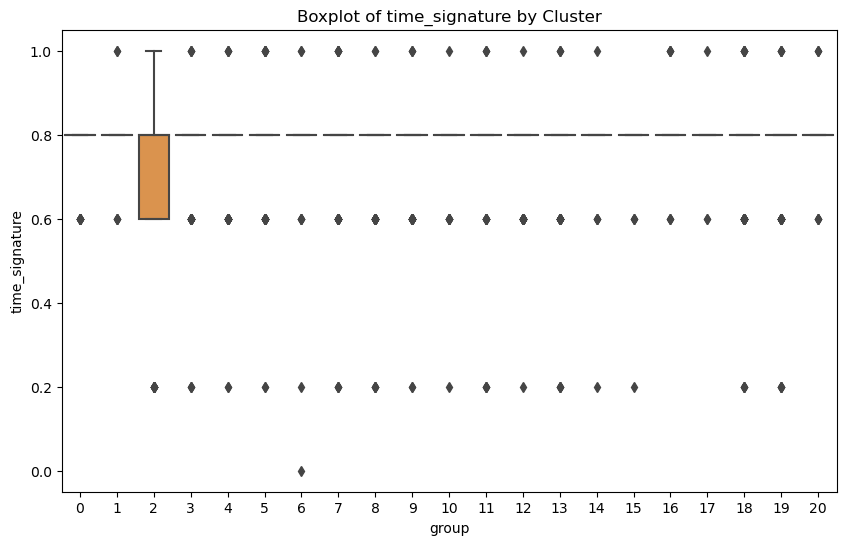

In [18]:
import matplotlib.pyplot as plt

# Plot boxplots for each variable in each cluster
for column in songs_df_minmax.columns[:-1]:  # Exclude the 'group' column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='group', y=column, data=songs_df_minmax)
    plt.title(f'Boxplot of {column} by Cluster')
    plt.show()

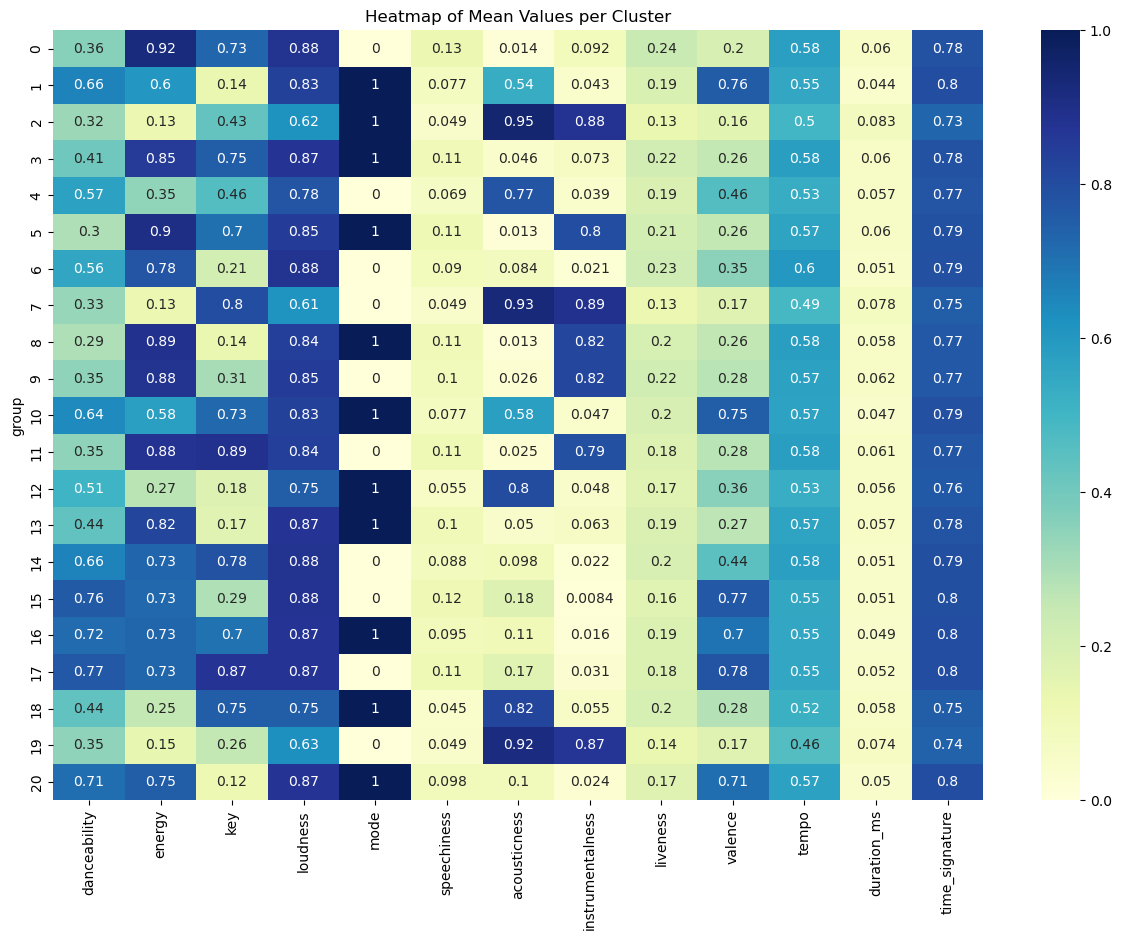

In [19]:
# Compute mean values for each cluster
cluster_means = songs_df_minmax.groupby('group').mean()

# Plot a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Mean Values per Cluster')
plt.show()

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Extract the cluster labels and features
cluster_labels = songs_df_minmax['group']
feature_columns = songs_df_minmax.columns[:-1]  # Exclude the 'group' column
features = songs_df_minmax[feature_columns]

# Calculate silhouette scores
silhouette_avg = silhouette_score(features, cluster_labels)
print(f"The average silhouette_score is: {silhouette_avg}")

# Calculate silhouette scores for each instance
sample_silhouette_values = silhouette_samples(features, cluster_labels)

The average silhouette_score is: 0.2112247398345933


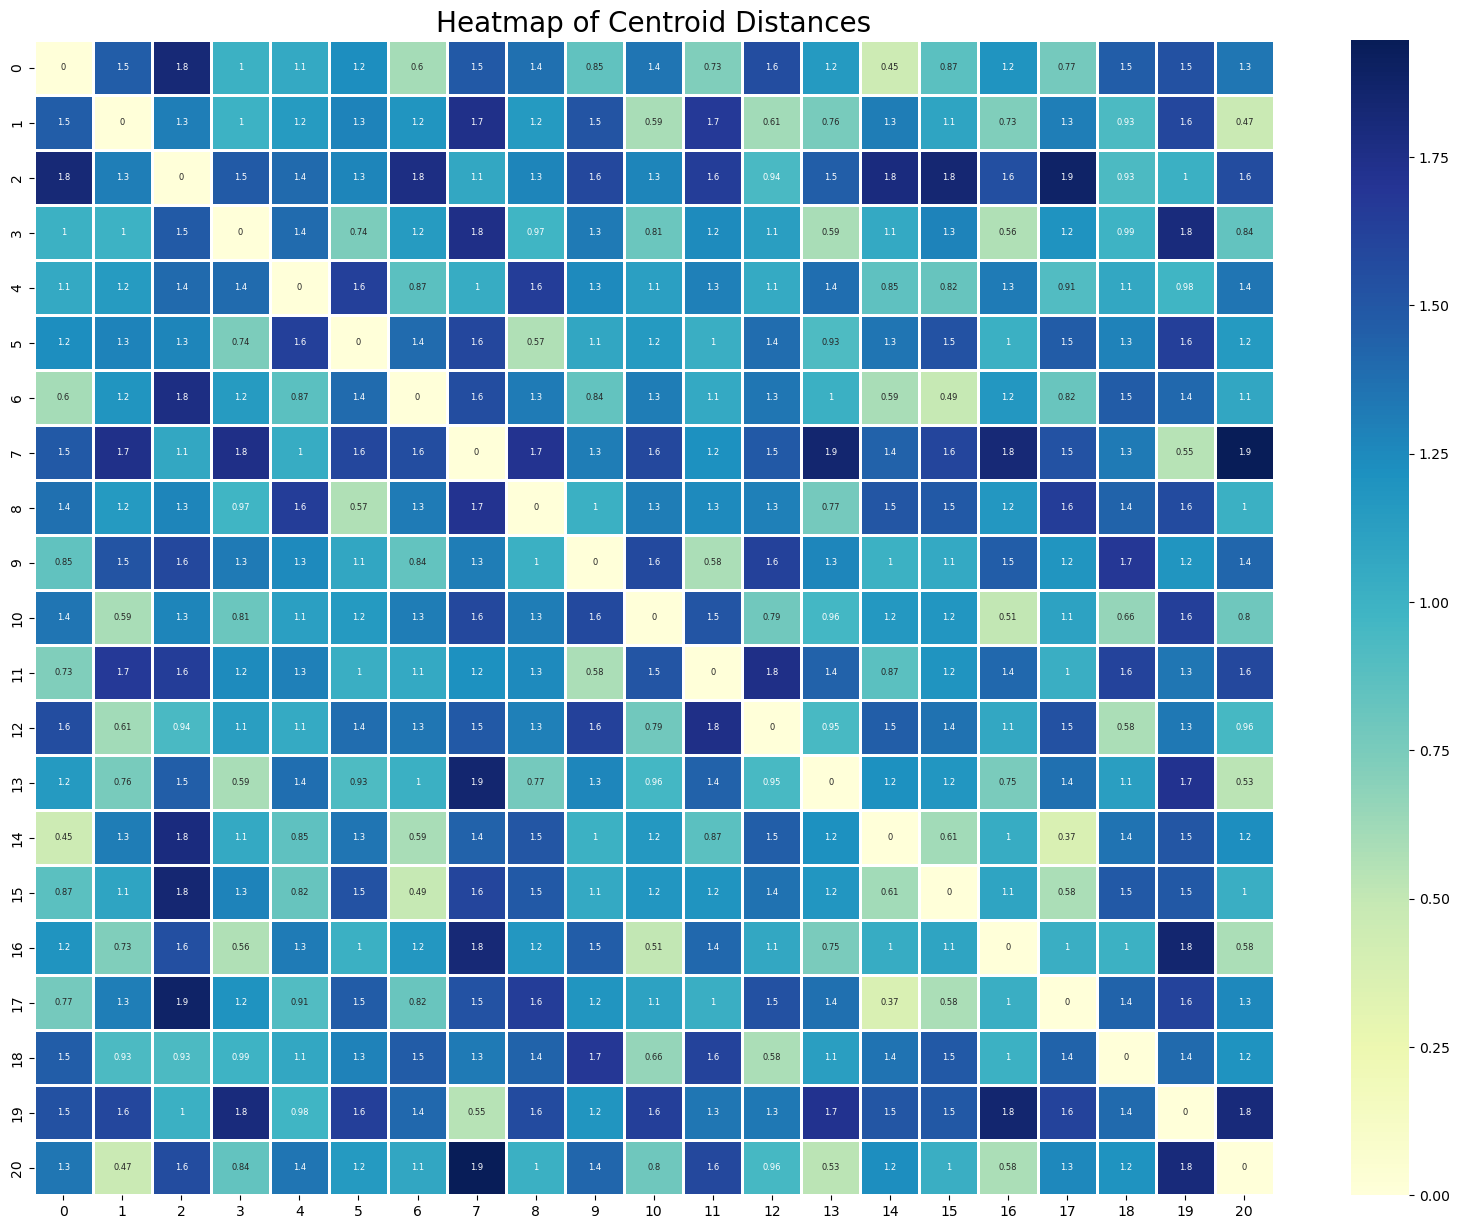

In [21]:
# Find the coordinates of each centroid using the cluster_centers_ attribute
centroids = my_kmeans.cluster_centers_

# Calculate the euclidean distance between the centroids
centroid_distances = pairwise_distances(centroids)

# Set the figure size
plt.figure(figsize=(20, 15))  # Adjust the size as needed

# Create a heatmap
# 'cmap' parameter controls the color map. You can choose one that provides better contrast.
# 'annot_kws' adjusts the font size of the annotations to make them fit better.
sns.heatmap(centroid_distances, annot=True, linewidths=1, cmap="YlGnBu", annot_kws={"size": 6})

# Optional: Adjust other plot settings
plt.title('Heatmap of Centroid Distances', fontsize=20)
plt.xticks(fontsize=10)  # Adjust font size as needed
plt.yticks(fontsize=10)  # Adjust font size as needed

# Display the heatmap
plt.show()

In [22]:
songs_df_minmax.sample(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,group
song_artist,,,,,,,,,,,,,,
Despacito - Remix - Luis Fonsi,0.675284,0.816,0.181818,0.907160,1.0,0.181917,0.228916,0.000000,0.097974,0.828426,0.832212,0.051828,0.8,20
Right Round - Flo Rida,0.744571,0.672,0.636364,0.866421,1.0,0.060022,0.009036,0.000000,0.235056,0.715736,0.584074,0.045435,0.8,16
Mass Appeal Madness - Napalm Death,0.280248,0.927,0.090909,0.752698,1.0,0.108388,0.000071,0.953299,0.130699,0.113706,0.498126,0.046756,0.8,8


In [24]:
songs_df_minmax.loc[songs_df_minmax["group"] == 15].sample(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,group
song_artist,,,,,,,,,,,,,,
REMIND ME - Rilès,0.871768,0.715,0.090909,0.887597,0.0,0.237473,0.036245,0.000000,0.076393,0.548223,0.425095,0.031259,0.8,15
"Auf das, was da noch kommt - LOTTE",0.619442,0.851,0.545455,0.902188,0.0,0.088126,0.079819,0.000003,0.107396,0.678173,0.559227,0.046813,0.8,15
My Number - Foals,0.660807,0.744,0.545455,0.841560,0.0,0.040087,0.032028,0.000465,0.472138,0.837563,0.598378,0.054922,0.8,15
